# Network Analysis in Python

### Introduction to Networks

Networks, or graphs as they are commonly referred to as, are important data structures that can provide valuable insight in data science.

Networks are a representation of relations between entities, where each entity is referred to as a node, and each node is connected by edges.

Many different systems can be conceptualised using networks. For example, transport networks, social networks, crime networks as well as many others.

This project aims to visualise and perform some analysis of networks using the networkx package.

### Methodology

First, lets import the modules that will be used in the project.

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Now lets initialise a graph by defining the nodes and edges between nodes.

We won't add any weights to the edges for now.

In [64]:
G=nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H"])
G.add_edges_from([('A','B'),('A','C'),('B','C'),('C','E'),('C','D'),('D','F'),('F','G'),('F','H')])

Let's take a look at the centrality of the graph. This is very useful for finding the most important entities in a network, ones that have the most connections or dependencies.

Nodes that occur on many shortest paths between
other nodes in the graph have a high betweenness
centrality score.

In [66]:
betweenValues = nx.betweenness_centrality(G)
print("Without weights: ", betweenValues)

Without weights:  {'A': 0.0, 'B': 0.0, 'C': 0.6666666666666666, 'D': 0.5714285714285714, 'E': 0.0, 'F': 0.5238095238095237, 'G': 0.0, 'H': 0.0}


It looks like the most cental point of the graph is node C, followed by D and then F.

Now, lets see what happens when we add some weights to the graph...

In [67]:
G1=nx.Graph()

In [68]:
G1.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H"])

In [69]:
G1.add_weighted_edges_from([('A','B',3.0),('A','C', 2.0),('B','C', 1.0),('C','E', 10.0),('C','D', 10.0),('D','F', 100.0),('F','G', 20.0),('F','H', 7.0)])

In [70]:
betweenValues = nx.betweenness_centrality(G1, weight = 'weight')
print("With weights: ", betweenValues)

With weights:  {'A': 0.0, 'B': 0.0, 'C': 0.6904761904761905, 'D': 0.5714285714285714, 'E': 0.0, 'F': 0.5238095238095237, 'G': 0.0, 'H': 0.0}


Although weights have been added to the edges, it looks like there hasn't been too much influence on centrality.

Now let's try to visualise the graph.

Due to the drawing routines of networkX, we need to draw the labels and the nodes separately. First, layout the graph and save the positions.

In [71]:
position = nx.spring_layout(G)

Now we will use these positions to draw the graph and then the labels.

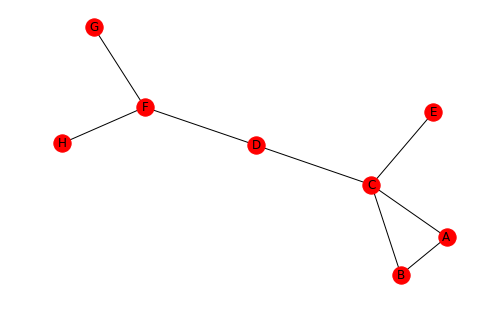

In [72]:
nx.draw(G,pos=position)
nx.draw_networkx_labels(G,pos=position)
plt.draw() 

### More complex networks...

Now we have made a simple network, we can expand on it using real data. The data used in the next part is from the paper: Coauthorships in network science: coauthorship network of scientists working on network theory and experiment, as compiled by M. Newman in May 2006.

Let's load in the necessary data...

In [94]:
G2=nx.read_graphml("netScience.graphml")

... and visualise...

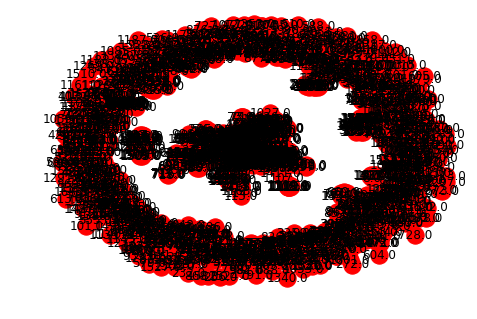

In [95]:
plt.figure(2)
position = nx.spring_layout(G2)
nx.draw(G2,pos=position)
nx.draw_networkx_labels(G2,pos=position)
plt.draw() 

Perhaps rendering the labels wasn't a very good idea. The network has become very cluttered!

Now for some information on the connectedness of the graph.

In [96]:
connectedComp = nx.connected_components(G2)
connectedComp = list(connectedComp)
countComp = len(connectedComp)
print ("This graph has ", countComp, " many connected components")

This graph has  396  many connected components


It is already sorted but just to make sure, we get the largest components...

In [97]:
compLengths = []
for i in range(0, countComp):
    compLengths.append(len(connectedComp[i]))

In [98]:
highestIndex = np.argmax(compLengths)
componentGraphs = list(nx.connected_component_subgraphs(G2))
largestComponent = componentGraphs[highestIndex]

This produces a subgraph with 379 nodes and 914 edges

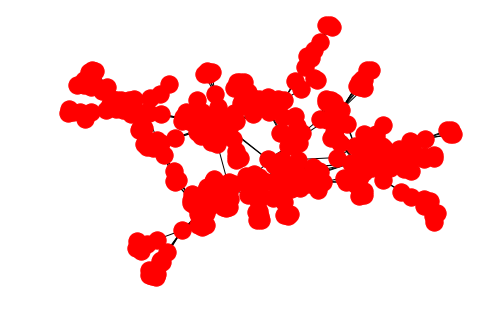

In [99]:
nx.draw(largestComponent)
plt.draw() 

Again, it looks very cluttered!

Let's take a look at the betweenness centrailty data for this graph...

In [100]:
betweenValues = nx.betweenness_centrality(largestComponent)

betweenValues is a dictionary, so let's get the values and keys in separate lists.


In [101]:
values = list(betweenValues.values())
keys = list(betweenValues.keys())

Let's find the index of the node with highest betweeness centrality.

In [102]:
highestIndex = np.argmax(values)
print("The node id ", keys[highestIndex], " has the centrality degree of ", values[highestIndex])

The node id  78.0  has the centrality degree of  0.39718418135681166


Now on to looking at clustering coefficients


In [103]:
overallAverage = []
for i in range(0, countComp):
    clustCoeff = nx.clustering( componentGraphs[i])
    coeffVals = list(clustCoeff.values())
    overallAverage.append(np.average(coeffVals))
    print ("Component: ", i, " Size of the component: ", len(componentGraphs[i].nodes()),  " coefficient: ", np.average(coeffVals))

Component:  0  Size of the component:  4  coefficient:  0.5833333333333334
Component:  1  Size of the component:  5  coefficient:  1.0
Component:  2  Size of the component:  8  coefficient:  0.5958333333333333
Component:  3  Size of the component:  8  coefficient:  0.9285714285714286
Component:  4  Size of the component:  3  coefficient:  1.0
Component:  5  Size of the component:  1  coefficient:  0.0
Component:  6  Size of the component:  3  coefficient:  1.0
Component:  7  Size of the component:  7  coefficient:  0.761904761904762
Component:  8  Size of the component:  1  coefficient:  0.0
Component:  9  Size of the component:  3  coefficient:  1.0
Component:  10  Size of the component:  379  coefficient:  0.7412306142925665
Component:  11  Size of the component:  6  coefficient:  1.0
Component:  12  Size of the component:  1  coefficient:  0.0
Component:  13  Size of the component:  2  coefficient:  0.0
Component:  14  Size of the component:  3  coefficient:  1.0
Component:  15  Siz

Component:  294  Size of the component:  2  coefficient:  0.0
Component:  295  Size of the component:  1  coefficient:  0.0
Component:  296  Size of the component:  1  coefficient:  0.0
Component:  297  Size of the component:  1  coefficient:  0.0
Component:  298  Size of the component:  1  coefficient:  0.0
Component:  299  Size of the component:  1  coefficient:  0.0
Component:  300  Size of the component:  3  coefficient:  1.0
Component:  301  Size of the component:  1  coefficient:  0.0
Component:  302  Size of the component:  1  coefficient:  0.0
Component:  303  Size of the component:  1  coefficient:  0.0
Component:  304  Size of the component:  2  coefficient:  0.0
Component:  305  Size of the component:  3  coefficient:  1.0
Component:  306  Size of the component:  4  coefficient:  1.0
Component:  307  Size of the component:  1  coefficient:  0.0
Component:  308  Size of the component:  2  coefficient:  0.0
Component:  309  Size of the component:  1  coefficient:  0.0
Componen

And let's print this central node's label (we need to look at the graphml for the names of the attribute fields)...

In [104]:
print (largestComponent.node[str(keys[highestIndex])]['label'])

NEWMAN, M


Now on to looking at clustering coefficients...

In [105]:
overallAverage = []
for i in range(0, countComp):
    clustCoeff = nx.clustering( componentGraphs[i])
    coeffVals = list(clustCoeff.values())
    overallAverage.append(np.average(coeffVals))
    print ("Component: ", i, " Size of the component: ", len(componentGraphs[i].nodes()),  " coefficient: ", np.average(coeffVals))

Component:  0  Size of the component:  4  coefficient:  0.5833333333333334
Component:  1  Size of the component:  5  coefficient:  1.0
Component:  2  Size of the component:  8  coefficient:  0.5958333333333333
Component:  3  Size of the component:  8  coefficient:  0.9285714285714286
Component:  4  Size of the component:  3  coefficient:  1.0
Component:  5  Size of the component:  1  coefficient:  0.0
Component:  6  Size of the component:  3  coefficient:  1.0
Component:  7  Size of the component:  7  coefficient:  0.761904761904762
Component:  8  Size of the component:  1  coefficient:  0.0
Component:  9  Size of the component:  3  coefficient:  1.0
Component:  10  Size of the component:  379  coefficient:  0.7412306142925665
Component:  11  Size of the component:  6  coefficient:  1.0
Component:  12  Size of the component:  1  coefficient:  0.0
Component:  13  Size of the component:  2  coefficient:  0.0
Component:  14  Size of the component:  3  coefficient:  1.0
Component:  15  Siz

Component:  146  Size of the component:  1  coefficient:  0.0
Component:  147  Size of the component:  1  coefficient:  0.0
Component:  148  Size of the component:  2  coefficient:  0.0
Component:  149  Size of the component:  2  coefficient:  0.0
Component:  150  Size of the component:  3  coefficient:  1.0
Component:  151  Size of the component:  2  coefficient:  0.0
Component:  152  Size of the component:  2  coefficient:  0.0
Component:  153  Size of the component:  4  coefficient:  1.0
Component:  154  Size of the component:  2  coefficient:  0.0
Component:  155  Size of the component:  1  coefficient:  0.0
Component:  156  Size of the component:  3  coefficient:  1.0
Component:  157  Size of the component:  4  coefficient:  0.5833333333333333
Component:  158  Size of the component:  1  coefficient:  0.0
Component:  159  Size of the component:  21  coefficient:  0.987218045112782
Component:  160  Size of the component:  2  coefficient:  0.0
Component:  161  Size of the component: 

Component:  312  Size of the component:  2  coefficient:  0.0
Component:  313  Size of the component:  2  coefficient:  0.0
Component:  314  Size of the component:  2  coefficient:  0.0
Component:  315  Size of the component:  2  coefficient:  0.0
Component:  316  Size of the component:  2  coefficient:  0.0
Component:  317  Size of the component:  3  coefficient:  1.0
Component:  318  Size of the component:  2  coefficient:  0.0
Component:  319  Size of the component:  3  coefficient:  1.0
Component:  320  Size of the component:  4  coefficient:  1.0
Component:  321  Size of the component:  1  coefficient:  0.0
Component:  322  Size of the component:  1  coefficient:  0.0
Component:  323  Size of the component:  1  coefficient:  0.0
Component:  324  Size of the component:  1  coefficient:  0.0
Component:  325  Size of the component:  9  coefficient:  0.9365079365079365
Component:  326  Size of the component:  1  coefficient:  0.0
Component:  327  Size of the component:  5  coefficient

Can we see the average clustering coefficient of the network?

In [106]:
print ("Average clustering coefficent is: ", np.average(overallAverage))

Average clustering coefficent is:  0.3550125098071741


Component 4 with a coefficient of 0.9872 and a size of 21 draws our attention. Let's take a closer look at this!

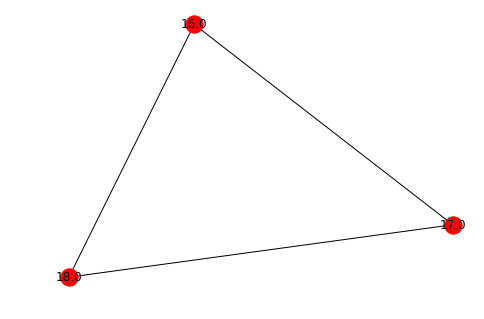

In [107]:
plt.figure(3)
position = nx.spring_layout(componentGraphs[4])
nx.draw(componentGraphs[4],pos=position)
nx.draw_networkx_labels(componentGraphs[4],pos=position)
plt.draw() 

### Conclusion

From this project, we have taken a quick look at graphs/networks. We have seen how they are structured and visualised, and how they can be quantitatively analysed.

The centrality of graphs has been studied, and we have been able to find the key entities within a network.

But why is this important?
There are several applications for this type of analysis in real life. For example, rail companies could use it to find what the most crucial train stations are in a network, and use this information to make sure they dont fail in bad conditions. Also, police could use information of members of a crime network to find out who are the key links in a gang. 

Network analysis can be extremely vauable in data science, and it is important to have an understanding of how and when to use them.